<a href="https://colab.research.google.com/github/favourphilic/Deep-Learning/blob/main/dogs_and_cats_ImageClassification_DatasetfromKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

## Download and use kaggle data in your Colab Notebook.

* Downloading and importing kaggle data in your colab notebook involve simple way.
* It involves the following steps.
   * 1. Ensure you have a kaggle account. If you don't one, you can create one at kaggle.com
   * 2. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens.

   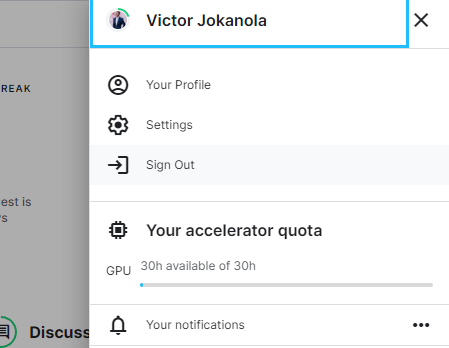

   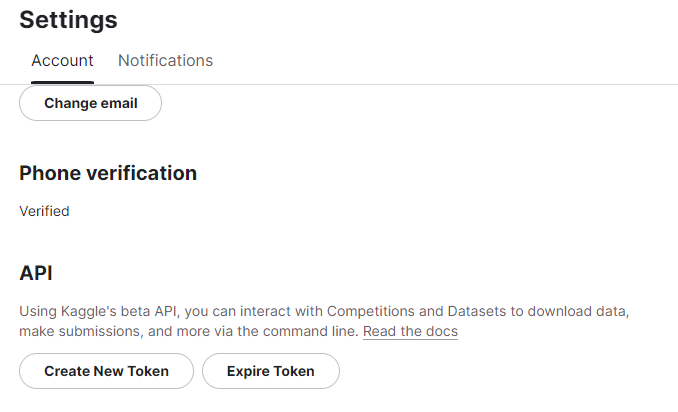
   * 3. Click on Create New API Token - It will download kaggle.json file on your machine.
   * 4. Run the subsequent codes in your colab notebook

In [ ]:

!pip install  -q kaggle

In [ ]:
# Step5. Use the code below to upload the downloaded json file to your colab environment.
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"favourphilicvictor","key":"3120c636fd76b25c96dc9d91eeb280f7"}'}

In [ ]:
#First, lets remove any kaggle directory 
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
# from the above code, it shows that we don't have any kaggle directory previously.
# now lets create a kaggle directory
!mkdir ~/.kaggle

In [ ]:
# Here, I will move the kaggle.json file into the recently created directory.
!cp kaggle.json ~/.kaggle/

In [ ]:
# Setting the permission rule for the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# The code below allow you to take a look at some of the dataset present in kaggle.
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8630        314  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1259         37  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           3904         91  1.0              
omartorres25/honda-data                                     

* To download a dataset of choice to your colab notebook.
   * First, log in to your kaggle account.
   * The next thing is to search for the dataset/competition. Once you are on the competition page.
   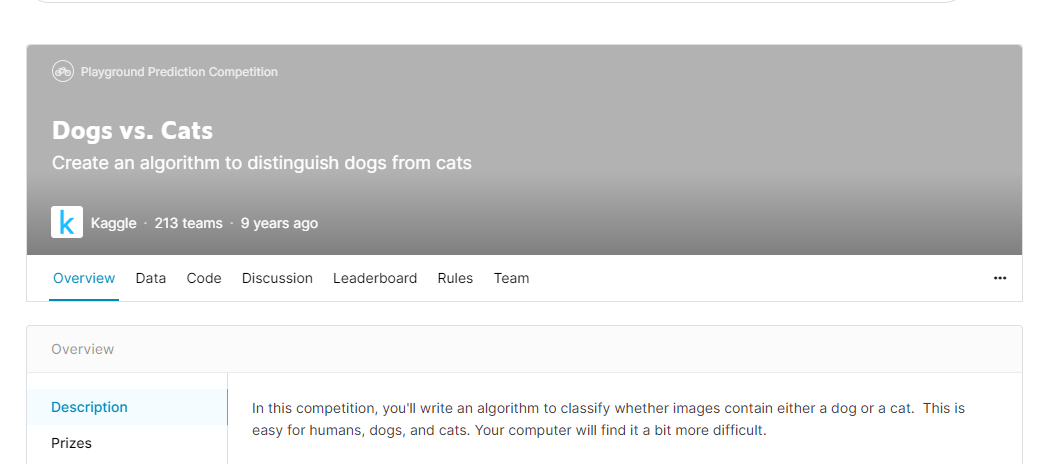
   * click on the data(page containing the dataset description) icon and scroll down until you see a  API command which you can copy.

   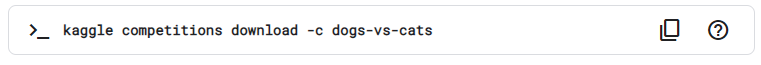

In [ ]:
# Here is how the dog-cat dataset API commnand looks like.
! kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:05<00:00, 161MB/s]
100% 812M/812M [00:05<00:00, 167MB/s]


In [ ]:
# A zip file will be downloaded using the code above.
# The downlaoded zip file will be located somewhere on the file tab of your colab notebook.
#Now let's unzip the file
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
# We now have the zipped train and test files.
# Let's further unzip the two files.
!unzip  -q train.zip 

* Using  the -q option will  suppress the verbose output that we would have experience and make the unzipping process faster.
* For example, ! unzip  train.zip, without the -q argument will produce some verbose outputs.

In [ ]:
# I won't use the -q tag when unzipping the test file.
# You will be able to see the verbose outputs
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import os, glob, shutil
import numpy as np
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [ ]:
original_path = r'/content/train'

train_folder = r'/content/train3'
cat_train_folder = r'/content/train3/cat'
dog_train_folder = r'/content/train3/dog'

valid_folder = r'/content/valid3'
cat_valid_folder = r'/content/valid3/cat'
dog_valid_folder = r'/content/valid3/dog'

test_folder = r'/content/test3'
cat_test_folder = r'/content/test3/cat'
dog_test_folder = r'/content/test3/dog'

In [ ]:
os.mkdir(train_folder)
os.mkdir(cat_train_folder)
os.mkdir(dog_train_folder)

os.mkdir(valid_folder)
os.mkdir(cat_valid_folder)
os.mkdir(dog_valid_folder)

os.mkdir(test_folder)
os.mkdir(cat_test_folder)
os.mkdir(dog_test_folder)

In [ ]:
filenames = [f'cat.{i}.jpg' for i in range(0, 1000) ]
for filename in filenames:
    src_path = os.path.join(original_path, filename)
    dst_path = os.path.join(cat_train_folder, filename)
    shutil.copy(src_path, dst_path)

In [ ]:
filenames = [f'dog.{i}.jpg' for i in range(0, 1000) ]
for filename in filenames:
    src_path = os.path.join(original_path, filename)
    dst_path = os.path.join(dog_train_folder, filename)
    shutil.copy(src_path, dst_path)

In [ ]:
filenames = [f'cat.{i}.jpg' for i in range(1000, 1500) ]
for filename in filenames:
    src_path = os.path.join(original_path, filename)
    dst_path = os.path.join(cat_valid_folder, filename)
    shutil.copy(src_path, dst_path)

In [ ]:
filenames = [f'dog.{i}.jpg' for i in range(1000, 1500) ]
for filename in filenames:
    src_path = os.path.join(original_path, filename)
    dst_path = os.path.join(dog_valid_folder, filename)
    shutil.copy(src_path, dst_path)

In [ ]:
filenames = [f'cat.{i}.jpg' for i in range(1500, 2000) ]
for filename in filenames:
    src_path = os.path.join(original_path, filename)
    dst_path = os.path.join(cat_test_folder, filename)
    shutil.copy(src_path, dst_path)

In [ ]:
filenames = [f'dog.{i}.jpg' for i in range(1500, 2000) ]
for filename in filenames:
    src_path = os.path.join(original_path, filename)
    dst_path = os.path.join(dog_test_folder, filename)
    shutil.copy(src_path, dst_path)

In [ ]:
def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
   

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Loading data into PyTorch

In [ ]:
train_path = r'/content/train3'
valid_path = r'/content/valid3'

In [ ]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
auto_transform = weights.transforms()
auto_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
train = datasets.ImageFolder(train_path, transform=auto_transform)
valid = datasets.ImageFolder(valid_path, transform=auto_transform)

In [ ]:
print(train.classes)
print(train.class_to_idx)

['cat', 'dog']
{'cat': 0, 'dog': 1}


In [ ]:
image, label = train[0]

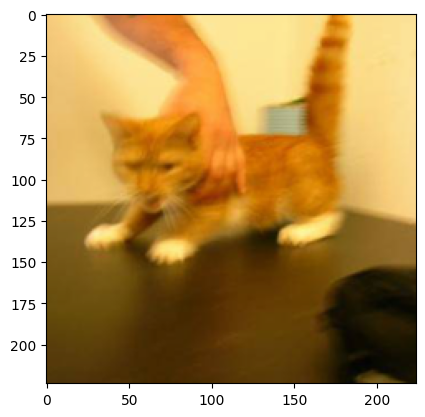

In [ ]:
imshow(image)

In [ ]:
train.classes[label]

'cat'

In [ ]:
print( f"Train data \n {train} \n Test data \n {valid}")

Train data 
 Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /content/train3
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           ) 
 Test data 
 Dataset ImageFolder
    Number of datapoints: 1000
    Root location: /content/valid3
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )


* Let's create a dataloader.


In [ ]:
from torch.utils.data import DataLoader
train_data_gen = DataLoader(train, shuffle = True, batch_size=32)
valid_data_gen = DataLoader(valid, shuffle= True, batch_size=32)

In [ ]:
print( f"The length of the train iterator is {len(train_data_gen.dataset)}")
print( f"The length of the train iterator is {len(valid_data_gen.dataset)}")

The length of the train iterator is 2000
The length of the train iterator is 1000


## Using the Efficientnet pretrained model


In [ ]:
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 99.2MB/s]


In [ ]:
import torchsummary
from torchsummary import summary


In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# Freeze all base layers in the "features" 
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
len(train.classes)

2

In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(train.classes)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
summary(model, input_size=(3, 224, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 128]             864
       BatchNorm2d-2         [-1, 32, 112, 128]              64
              SiLU-3         [-1, 32, 112, 128]               0
            Conv2d-4         [-1, 32, 112, 128]             288
       BatchNorm2d-5         [-1, 32, 112, 128]              64
              SiLU-6         [-1, 32, 112, 128]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 128]               0
           Conv2d-13         [-1, 16, 112, 128]             512
      BatchNorm2d-14         [-1, 16, 1

In [ ]:
# Getting accuracy function from pytorch repo
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn 
# Note: could also use torchmetrics.
# Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start, end, device= None):
   
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
# Our trainstep function

def train_step(model,data_loader,loss_fn,optimizer,accuracy_fn,device = device):
    train_loss, train_acc = 0, 0

    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
         # Go from logits -> pred labels
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



In [ ]:
# our test step function
def test_step(model,data_loader,loss_fn,accuracy_fn,device = device):
    test_loss, test_acc = 0, 0

    model.eval() 
    with torch.inference_mode(): 
        for X, y in data_loader:
          
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1) )
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

# To  Measure time
from timeit import default_timer as timer
start_time = timer()

epochs = 3
for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n---------")

    train_step(data_loader=train_data_gen, model=model, loss_fn=loss_fn,optimizer=optimizer, accuracy_fn=accuracy_fn)
    
    test_step(data_loader=valid_data_gen,model=model,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

end_time = timer()



total_train_time_model_1 = print_train_time(start=start_time,end=end_time,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.25943 | Train accuracy: 89.93%
Test loss: 0.14529 | Test accuracy: 95.21%

Epoch: 1
---------
Train loss: 0.14222 | Train accuracy: 95.09%
Test loss: 0.10107 | Test accuracy: 96.48%

Epoch: 2
---------
Train loss: 0.12883 | Train accuracy: 95.54%
Test loss: 0.09265 | Test accuracy: 96.58%

Train time on cuda: 79.288 seconds


## Lets make some prediction 


In [ ]:
torch.manual_seed(42)
def eval_model(model,data_loader,loss_fn,accuracy_fn):
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) 
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


# Lets step up the test data and its iterator

In [ ]:
test_path = r'/content/test3'
test = datasets.ImageFolder(test_path, transform=auto_transform)
test_data_gen = DataLoader(test, shuffle= True, batch_size=32)

In [ ]:
test_data_gen.dataset

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: /content/test3
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )

In [ ]:
model_result = eval_model(model=model,data_loader=test_data_gen,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_result

{'model_name': 'EfficientNet',
 'model_loss': 0.11567853391170502,
 'model_acc': 95.3125}

## Making Rabdom Prediction

In [ ]:
def make_predictions(model, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
           # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
class_names = test.classes

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([3, 224, 224])
Test sample label: 1 (dog)


In [ ]:
# Make predictions on test samples with our  model 
pred_probs= make_predictions(model=model, data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.3459e-04, 9.9987e-01],
        [6.2572e-01, 3.7428e-01]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([1, 0, 0, 1, 0, 0, 0, 0, 1], tensor([1, 0, 0, 1, 0, 0, 0, 0, 1]))

1. https://www.kaggle.com/general/74235
2. https://www.youtube.com/watch?v=57N1g8k2Hwc